# Homicide Reports

In [13]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [14]:
!dropdb -U student final

dropdb: database removal failed: ERROR:  database "final" is being accessed by other users
DETAIL:  There is 1 other session using the database.


In [3]:
!createdb -U student final

In [4]:
%sql postgresql://student@/final

'Connected: student@final'

## Creadting a new folder for this project

In [15]:
cd ..

/home/ubuntu


In [16]:
!pwd

/home/ubuntu


In [17]:
!mkdir Group14_Final_Project

mkdir: cannot create directory ‘Group14_Final_Project’: File exists


In [18]:
os.chdir("Group14_Final_Project")

In [19]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

##### We decide to wrangling our data before we normalize our dataset into tables. We have checked our data and found many unreasonable spots such as Null value, ridiculou large age, useless columns and unreasonable age range. We used Trifacta to wrangle our data. Following is our recipe:

1. Break into rows using '\n' as a delimiter
2. Split column1 into 20 columns on ","
3. Convert row 1 to header
4. Delete rows where (950<={Victim Age})&&({Victim Age})<1000)
5. Delete rows where (0<={Perpetrator Age})&&({Prepetrator Age}<5)
6. Keep rows where (5<={Perpetrator Age})&&({Perpetrator Age})<=99）
7. Delete Record ID
8. Delete Victim Ethnicity
9. Delete Perpetrator Ethnicity
10. Delete Record Source

## Downloading Dataset

##### After we wrangleing our data, the size of our dataset reduced to 74.28MB, which is satisfied for the requirement. We uploaded the dataset to S3 storage, which allows any users to download the tidied data.

In [20]:
!wget https://gaoyux-2019.s3.amazonaws.com/newhomi1.csv

--2019-12-01 18:05:30--  https://gaoyux-2019.s3.amazonaws.com/newhomi1.csv
Resolving gaoyux-2019.s3.amazonaws.com (gaoyux-2019.s3.amazonaws.com)... 52.216.226.16
Connecting to gaoyux-2019.s3.amazonaws.com (gaoyux-2019.s3.amazonaws.com)|52.216.226.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77892377 (74M) [text/csv]
Saving to: ‘newhomi1.csv’

newhomi1.csv        100%[===================>]  74.28M  57.5MB/s    in 1.3s    

2019-12-01 18:05:31 (57.5 MB/s) - ‘newhomi1.csv’ saved [77892377/77892377]



In [21]:
!head -n 10 newhomi1.csv

"Agency Code","Agency Name","Agency Type","City","State","Year","Month","Incident","Crime Type","Crime Solved","Victim Sex","Victim Age","Victim Race","Perpetrator Sex","Perpetrator Age","Perpetrator Race","Relationship","Weapon","Victim Count","Perpetrator Count"
"AK00101","Anchorage","Municipal Police","Anchorage","Alaska","1980","January","1","Murder or Manslaughter","Yes","Male","14","Native American/Alaska Native","Male","15","Native American/Alaska Native","Acquaintance","Blunt Object","0","0"
"AK00101","Anchorage","Municipal Police","Anchorage","Alaska","1980","March","1","Murder or Manslaughter","Yes","Male","43","White","Male","42","White","Acquaintance","Strangulation","0","0"
"AK00101","Anchorage","Municipal Police","Anchorage","Alaska","1980","April","1","Murder or Manslaughter","Yes","Male","43","White","Male","42","White","Acquaintance","Strangulation","0","0"
"AK00101","Anchorage","Municipal Police","Anchorage","Alaska","1980","May","1","Murder or Manslaughter","Yes","Ma

In [22]:
!wc -l newhomi1.csv

421700 newhomi1.csv


In [23]:
!head -n 5000 newhomi1.csv | csvstat

  1. "Agency Code"

	Type of data:          Text
	Contains null values:  False
	Unique values:         899
	Longest value:         7 characters
	Most common values:    CA01942 (667x)
	                       FL01306 (118x)
	                       FL01300 (110x)
	                       GAAPD00 (110x)
	                       CA01900 (98x)

  2. "Agency Name"

	Type of data:          Text
	Contains null values:  False
	Unique values:         808
	Longest value:         34 characters
	Most common values:    Los Angeles (765x)
	                       Miami (120x)
	                       Miami-Dade (110x)
	                       Atlanta (110x)
	                       Washington (102x)

  3. "Agency Type"

	Type of data:          Text
	Contains null values:  False
	Unique values:         5
	Longest value:         16 characters
	Most common values:    Municipal Police (3690x)
	                       Sheriff (1109x)
	                       County Police (158x)
	                       State Polic

##### Based on these values, we can create the transactional table as follows:

In [24]:
%%sql
DROP TABLE IF EXISTS homicide;

CREATE TABLE homicide (
    Agency_Code        VARCHAR(200) NOT NULL,
    Agency_Name        VARCHAR(200) NOT NULL,
    Agency_Type        VARCHAR(200) NOT NULL,
    City               VARCHAR(200) NOT NULL,
    State              VARCHAR(200) NOT NULL,
    Year               numeric(4) NOT NULL,
    Month              varchar(10) NOT NULL,
    Incident           numeric(3) NOT NULL,
    Crime_Type         VARCHAR(200) NOT NULL,
    Crime_Solved       VARCHAR(200) NOT NULL,
    Victim_Sex         VARCHAR(200) NOT NULL,
    Victim_Age         numeric(3) NOT NULL,
    Victim_Race        VARCHAR(200) NOT NULL,
    Perpetrator_Sex    VARCHAR(200) NOT NULL,
    Perpetrator_Age    numeric(3) NOT NULL ,
    Perpetrator_Race   VARCHAR(200) NOT NULL,
    Relationship       VARCHAR(200) NOT NULL,
    Weapon             VARCHAR(200) NOT NULL,
    Victim_Count       numeric(2) NOT NULL,
    Perpetrator_Count  numeric(2) NOT NULL
    
);

 * postgresql://student@/final
Done.
Done.


[]

In [25]:
%%sql
COPY homicide FROM '/home/ubuntu/Group14_Final_Project/newhomi1.csv'
CSV
HEADER;

 * postgresql://student@/final
421699 rows affected.


[]

##### we count rows in table and in csv file to make sure all the data has been loaded into the transactional table.

In [26]:
%%sql
SELECT COUNT(*) FROM homicide;

 * postgresql://student@/final
1 rows affected.


count
421699


In [27]:
!wc -l newhomi1.csv

421700 newhomi1.csv


##### Let's have a look at few loaded db records to make sure the data was loaded successfully.

In [28]:
%%sql
SELECT * FROM homicide
LIMIT 10

 * postgresql://student@/final
10 rows affected.


agency_code,agency_name,agency_type,city,state,year,month,incident,crime_type,crime_solved,victim_sex,victim_age,victim_race,perpetrator_sex,perpetrator_age,perpetrator_race,relationship,weapon,victim_count,perpetrator_count
AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0,0
AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0
AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0
AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,Male,30,White,Male,36,White,Acquaintance,Rifle,0,0
AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,Female,42,Native American/Alaska Native,Male,27,Black,Wife,Knife,0,0
AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,1,Murder or Manslaughter,Yes,Female,99,White,Male,35,White,Wife,Knife,0,0
AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,Yes,Male,38,White,Male,40,Unknown,Unknown,Firearm,0,1
AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,July,2,Murder or Manslaughter,Yes,Male,20,White,Male,49,White,Stranger,Shotgun,0,0
AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,July,3,Murder or Manslaughter,Yes,Female,36,Black,Male,39,Black,Girlfriend,Blunt Object,0,0
AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,August,1,Murder or Manslaughter,Yes,Male,20,Native American/Alaska Native,Male,49,White,Unknown,Fall,0,0


Next we need to look at the current transactional design and build the dimensional equivalent to the design

## More ETL with SQL

##### We started with this schema:

In [29]:
from IPython.display import Image

In [89]:
Image(url="https://github.com/tianweima/data_management/blob/master/homicide.png?raw=true")

##### Our aim is to build a star schema that will allow us to do analytical analysis on and gain business intellegence from the data. We have created a star schema for discussion.

In [31]:
Image(url="https://github.com/tianweima/data_management/blob/master/starschema.png?raw=true")

##### Now, we create the agency table

In [33]:
%%sql
DROP TABLE IF EXISTS agency;

CREATE TABLE agency (
    key SERIAL PRIMARY KEY,
    Code VARCHAR(200),
    Name VARCHAR(200),
    Type VARCHAR(200)
);

 * postgresql://student@/final
Done.
Done.


[]

In [34]:
%%sql
INSERT INTO agency (Code, Name, Type)
SELECT DISTINCT Agency_Code AS code, 
       Agency_Name AS name,
       Agency_Type AS a_type
FROM homicide;

 * postgresql://student@/final
12865 rows affected.


[]

In [35]:
%%sql
SELECT * FROM agency LIMIT 10;

 * postgresql://student@/final
10 rows affected.


key,code,name,type
1,IN344SP,State Police: Lagrange County,State Police
2,MO01700,Carroll County,Sheriff
3,CT00119,Rocky Hill,Municipal Police
4,SC01100,Cherokee County,Sheriff
5,FL03201,Marianna,Municipal Police
6,MI25221,Atlas Township,Regional Police
7,OH01900,Darke,Sheriff
8,GA01702,Midville,Municipal Police
9,FL06005,Wildwood,Municipal Police
10,NC08500,Stokes County,Sheriff


##### create the time table

In [36]:
%%sql
DROP TABLE IF EXISTS time;

CREATE TABLE time (
    key SERIAL PRIMARY KEY,
    Year numeric(4) NOT NULL,
    Month varchar(10) NOT NULL
);

 * postgresql://student@/final
Done.
Done.


[]

In [37]:
%%sql
INSERT INTO time (Year,Month)
SELECT DISTINCT Year AS year, 
       Month AS month
FROM homicide;

 * postgresql://student@/final
420 rows affected.


[]

In [38]:
%%sql
SELECT * FROM time LIMIT 10;

 * postgresql://student@/final
10 rows affected.


key,year,month
1,2003,October
2,1986,November
3,1998,May
4,2006,July
5,1999,March
6,1996,July
7,2010,January
8,2004,January
9,2008,February
10,1990,December


##### create the crime table

In [39]:
%%sql
DROP TABLE IF EXISTS crime;

CREATE TABLE crime (
    key SERIAL PRIMARY KEY,
    Crime_Type         VARCHAR(200) NOT NULL,
    Relationship       VARCHAR(200) NOT NULL,
    Weapon             VARCHAR(200) NOT NULL
);

 * postgresql://student@/final
Done.
Done.


[]

In [40]:
%%sql
INSERT INTO crime (Crime_Type,Relationship,Weapon)
SELECT DISTINCT Crime_Type AS c_type, 
       Relationship AS relationship,
       Weapon AS weapon
FROM homicide;

 * postgresql://student@/final
658 rows affected.


[]

In [41]:
%%sql
SELECT* FROM crime LIMIT 10;

 * postgresql://student@/final
10 rows affected.


key,crime_type,relationship,weapon
1,Murder or Manslaughter,Mother,Fall
2,Murder or Manslaughter,In-Law,Drowning
3,Murder or Manslaughter,Acquaintance,Explosives
4,Manslaughter by Negligence,Husband,Handgun
5,Murder or Manslaughter,Daughter,Shotgun
6,Murder or Manslaughter,Unknown,Rifle
7,Murder or Manslaughter,Friend,Strangulation
8,Murder or Manslaughter,Stepfather,Suffocation
9,Manslaughter by Negligence,Girlfriend,Drugs
10,Manslaughter by Negligence,Boyfriend,Fall


##### create the location table

In [42]:
%%sql
DROP TABLE IF EXISTS location;

CREATE TABLE location (
    key SERIAL PRIMARY KEY,
    City    VARCHAR(200) NOT NULL,
    State   VARCHAR(200) NOT NULL

);

 * postgresql://student@/final
Done.
Done.


[]

In [43]:
%%sql
INSERT INTO location(City,State)
SELECT DISTINCT City AS city, 
    State AS state
FROM homicide;

 * postgresql://student@/final
3023 rows affected.


[]

In [44]:
%%sql
SELECT* FROM location LIMIT 10;

 * postgresql://student@/final
10 rows affected.


key,city,state
1,Greene,Indiana
2,Atchison,Missouri
3,Pawnee,Kansas
4,Wilcox,Alabama
5,Broward,Florida
6,Lamb,Texas
7,Decatur,Kansas
8,Dunn,North Dakota
9,Hardeman,Tennessee
10,Wheatland,Montana


##### create the victim table

In [45]:
%%sql
DROP TABLE IF EXISTS victim;

CREATE TABLE victim (
     key SERIAL PRIMARY KEY,
    Victim_Sex         VARCHAR(200) NOT NULL,
    Victim_Age         numeric(3) NOT NULL,
    Victim_Race        VARCHAR(200) NOT NULL,
    Victim_Count       numeric(2) NOT NULL
    
);


 * postgresql://student@/final
Done.
Done.


[]

In [46]:
%%sql
INSERT INTO victim(Victim_Sex, Victim_Age, Victim_Race, Victim_Count)
SELECT DISTINCT Victim_Sex AS sex, 
    Victim_age AS age,
    Victim_Race As race,
    Victim_Count As count
FROM homicide;

 * postgresql://student@/final
3799 rows affected.


[]

In [47]:
%%sql
SELECT * FROM victim LIMIT 10;

 * postgresql://student@/final
10 rows affected.


key,victim_sex,victim_age,victim_race,victim_count
1,Male,74,White,1
2,Male,62,White,2
3,Female,21,Black,0
4,Male,38,Black,3
5,Male,37,White,3
6,Female,54,Asian/Pacific Islander,5
7,Male,46,White,2
8,Female,99,Black,1
9,Female,35,Unknown,0
10,Female,59,Black,4


##### create the perpetrator table

In [48]:
%%sql
DROP TABLE IF EXISTS perpetrator;

CREATE TABLE perpetrator (
    key SERIAL PRIMARY KEY,
    Perpetrator_Sex    VARCHAR(200) NOT NULL,
    Perpetrator_Age    numeric(3) NOT NULL ,
    Perpetrator_Race   VARCHAR(200) NOT NULL,
    Perpetrator_Count  numeric(2) NOT NULL

);


 * postgresql://student@/final
Done.
Done.


[]

In [49]:
%%sql
INSERT INTO perpetrator(Perpetrator_Sex, Perpetrator_Age, Perpetrator_Race, Perpetrator_Count)
SELECT DISTINCT Perpetrator_Sex As sex,
    Perpetrator_Age As age,
    Perpetrator_Race As race,
    Perpetrator_Count As count
FROM homicide;

 * postgresql://student@/final
2350 rows affected.


[]

In [50]:
%%sql
SELECT * FROM perpetrator LIMIT 10;

 * postgresql://student@/final
10 rows affected.


key,perpetrator_sex,perpetrator_age,perpetrator_race,perpetrator_count
1,Male,51,White,5
2,Male,74,White,1
3,Female,38,Black,1
4,Male,13,Native American/Alaska Native,2
5,Male,62,White,2
6,Female,37,White,1
7,Male,25,Unknown,1
8,Female,21,Black,0
9,Male,38,Black,3
10,Male,37,White,3


##### Insert all the 6 foreign keys into the homicide table to link the fact and dimension tables

In [51]:
%%sql
ALTER TABLE homicide
ADD COLUMN agency_key INTEGER,
ADD CONSTRAINT fk_Agency_Code
    FOREIGN KEY (agency_key)
    REFERENCES agency (key);

 * postgresql://student@/final
Done.


[]

In [52]:
%%sql
UPDATE homicide
SET agency_key = agency.key
FROM agency
WHERE homicide.Agency_Code = agency.Code AND homicide.Agency_Name = agency.Name AND homicide.Agency_Type = agency.Type;

 * postgresql://student@/final
421699 rows affected.


[]

In [53]:
%%sql
ALTER TABLE homicide 
ADD COLUMN time_key INTEGER,
ADD CONSTRAINT fk_Year
    FOREIGN KEY (time_key)
    REFERENCES time (key);

 * postgresql://student@/final
Done.


[]

In [54]:
%%sql
UPDATE homicide
SET time_key =time.key
FROM time
WHERE homicide.Year = time.year AND homicide.Month=time.month;

 * postgresql://student@/final
421699 rows affected.


[]

In [55]:
%%sql
ALTER TABLE homicide
ADD COLUMN crime_key INTEGER,
ADD CONSTRAINT fk_Relationship
    FOREIGN KEY (crime_key)
    REFERENCES crime (key);

 * postgresql://student@/final
Done.


[]

In [56]:
%%sql
UPDATE homicide
SET crime_key = crime.key
FROM crime
WHERE homicide.Relationship = crime.relationship AND homicide.Weapon=crime.weapon AND homicide.Crime_Type=crime.Crime_Type;

 * postgresql://student@/final
421699 rows affected.


[]

In [57]:
%%sql
ALTER TABLE homicide
ADD COLUMN location_key INTEGER,
ADD CONSTRAINT fk_city
    FOREIGN KEY (location_key)
    REFERENCES location (key);

 * postgresql://student@/final
Done.


[]

In [58]:
%%sql
UPDATE homicide
SET location_key = location.key
FROM location
WHERE homicide.City = location.city AND homicide.State=location.state;

 * postgresql://student@/final
421699 rows affected.


[]

In [59]:
%%sql
ALTER TABLE homicide
ADD COLUMN victim_key INTEGER,
ADD CONSTRAINT fk_Victim_Race
    FOREIGN KEY (victim_key)
    REFERENCES victim (key);

 * postgresql://student@/final
Done.


[]

In [60]:
%%sql
UPDATE homicide
SET victim_key =victim.key
FROM victim
WHERE homicide.Victim_Sex = victim.Victim_Sex AND homicide.Victim_Race = victim.Victim_Race AND homicide.Victim_Age = victim.Victim_Age AND homicide.Victim_Count = victim.Victim_Count;

 * postgresql://student@/final
421699 rows affected.


[]

In [61]:
%%sql
ALTER TABLE homicide
ADD COLUMN perpetrator_key INTEGER,
ADD CONSTRAINT fk_Perpetrator_Race
    FOREIGN KEY (perpetrator_key)
    REFERENCES perpetrator (key);

 * postgresql://student@/final
Done.


[]

In [62]:
%%sql
UPDATE homicide
SET perpetrator_key =perpetrator.key
FROM perpetrator
WHERE homicide.Perpetrator_Sex = perpetrator.Perpetrator_Sex AND homicide.Perpetrator_Race = perpetrator.Perpetrator_Race AND homicide.Perpetrator_Age = perpetrator.Perpetrator_Age AND homicide.Perpetrator_Count = perpetrator.Perpetrator_Count;

 * postgresql://student@/final
421699 rows affected.


[]

##### Drop columns in fact table that already existed in dimension tables

In [63]:
%%sql
ALTER TABLE homicide
DROP COLUMN Agency_Code,
DROP COLUMN Agency_Name,
DROP COLUMN Agency_Type,
DROP COLUMN City,
DROP COLUMN State,
DROP COLUMN Year,
DROP COLUMN Month,
DROP COLUMN Crime_Type,
DROP COLUMN Victim_Sex,
DROP COLUMN Victim_Age,
DROP COLUMN Victim_Race,
DROP COLUMN Perpetrator_Sex,
DROP COLUMN Perpetrator_Age,
DROP COLUMN Perpetrator_Race,
DROP COLUMN Relationship,
DROP COLUMN Weapon,
DROP COLUMN Victim_Count,
DROP COLUMN Perpetrator_Count;

 * postgresql://student@/final
Done.


[]

##### Look at the final homicide table

In [64]:
%%sql
SELECT *
FROM homicide
LIMIT 10;

 * postgresql://student@/final
10 rows affected.


incident,crime_solved,agency_key,time_key,crime_key,location_key,victim_key,perpetrator_key
2,Yes,4134,154,343,631,226,1832
1,Yes,6144,320,59,2120,2985,1138
2,Yes,11347,385,294,1924,3298,843
1,Yes,12660,241,294,1173,3062,269
1,Yes,2126,320,312,974,3470,1018
1,Yes,7188,37,579,1663,1338,500
26,Yes,10330,385,204,1844,1374,1637
1,Yes,3765,305,583,1891,1613,1385
1,Yes,1988,332,312,2467,743,1791
1,Yes,10119,305,252,1888,1118,1570


# Business Question 1.

## Police Force Distribution:

### From our dataset, the first interesting question that comes to mind is about the police force distribution. We believe that 100% of all cases are solved. Thus we tried to sort out those unsolved cases and focus on which state/city state governments should potentially increase the size of their police force.  

#### We seperated two different criminal types to see the distribution (we think the last five years data can provide worthy estimates), and we selected data from 2010 to 2014

##### Crime type: Murder or Manslaughter

In [115]:
%%sql
DROP TABLE IF EXISTS MM1014 cascade;

CREATE TABLE MM1014 AS
SELECT state, crime_type, sum(case when crime_solved = 'Yes' then 1 else 0 end) as "Solved Case", count(*) as "Total Case"
FROM crime
JOIN homicide
  ON crime.key = homicide.crime_key
Join location
  ON location.key = homicide.location_key
Join time
  ON time.key = homicide.time_key
WHERE year BETWEEN 2010 AND 2014 AND crime_type = 'Murder or Manslaughter'
GROUP BY state,crime_type
ORDER BY state
;

 * postgresql://student@/final
Done.
51 rows affected.


[]

In [116]:
%%sql
ALTER TABLE MM1014
ADD COLUMN "Solved Percentage%" float;

UPDATE MM1014
SET "Solved Percentage%" = round("Solved Case"::numeric/"Total Case"::numeric*100,2);

 * postgresql://student@/final
Done.
51 rows affected.


[]

In [117]:
%%sql
SELECT *
FROM MM1014;

 * postgresql://student@/final
51 rows affected.


state,crime_type,Solved Case,Total Case,Solved Percentage%
Alabama,Murder or Manslaughter,141,141,100.0
Alaska,Murder or Manslaughter,163,165,98.79
Arizona,Murder or Manslaughter,1248,1248,100.0
Arkansas,Murder or Manslaughter,599,611,98.04
California,Murder or Manslaughter,5567,5567,100.0
Colorado,Murder or Manslaughter,700,710,98.59
Connecticut,Murder or Manslaughter,370,370,100.0
Delaware,Murder or Manslaughter,148,148,100.0
District of Columbia,Murder or Manslaughter,222,222,100.0
Florida,Murder or Manslaughter,3154,3191,98.84


#### We believe that areas with solved percentages lower than 100% require attention, so we got rid of places with a solved percentage of 100%

In [118]:
v1_MM1014 = %%sql Select * from MM1014 WHERE "Solved Percentage%"<100 ORDER BY "Solved Percentage%"
;

 * postgresql://student@/final
23 rows affected.


''

In [119]:
v1_1_MM1014 = v1_MM1014.DataFrame()

In [120]:
v1_1_MM1014

,state,crime_type,Solved Case,Total Case,Solved Percentage%
0,Idaho,Murder or Manslaughter,132,136,97.06
1,Ohio,Murder or Manslaughter,1503,1540,97.60
2,Arkansas,Murder or Manslaughter,599,611,98.04
3,Colorado,Murder or Manslaughter,700,710,98.59
4,West Virginia,Murder or Manslaughter,302,306,98.69
5,Alaska,Murder or Manslaughter,163,165,98.79
6,Florida,Murder or Manslaughter,3154,3191,98.84
7,New York,Murder or Manslaughter,2121,2141,99.07
8,Michigan,Murder or Manslaughter,1826,1841,99.19
9,Utah,Murder or Manslaughter,268,270,99.26


In [121]:
x_axis1 = v1_1_MM1014.state.unique()
state1 = v1_1_MM1014["state"]
Solved_Per1 = v1_1_MM1014["Solved Percentage%"]

Text(0.5,1,'Murder or Manslaughter Case Solve Percentage from 2010-2014')

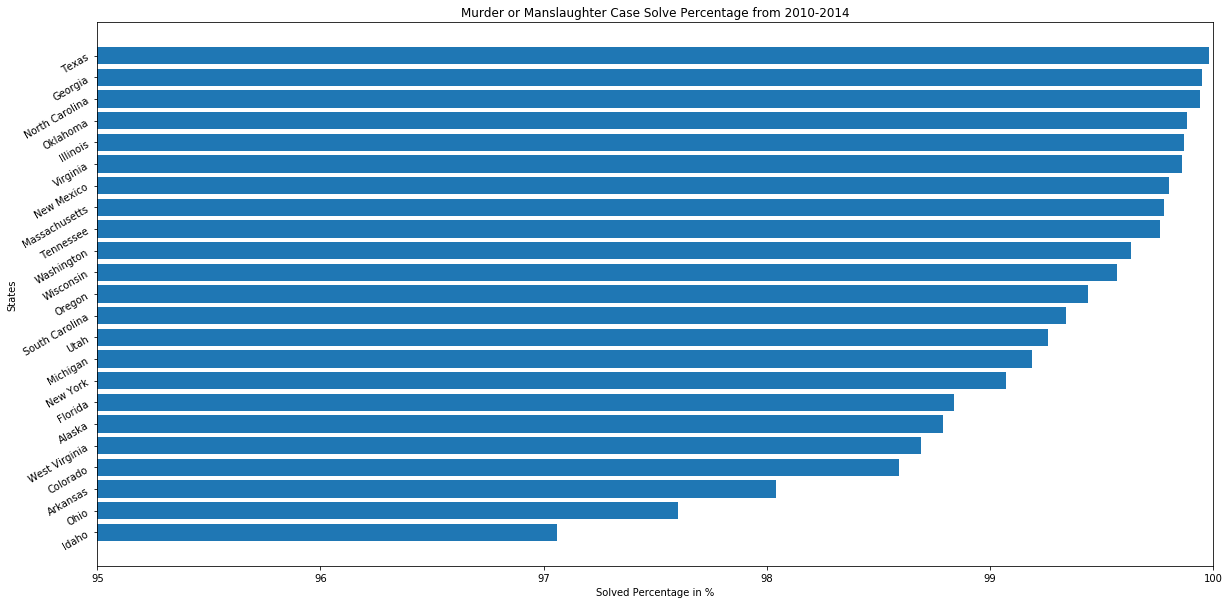

In [122]:
plt.figure(figsize=(20,10))
plt.barh(x_axis1, Solved_Per1, align='center', label='Solved Percent')
plt.yticks(x_axis1, state1, rotation=30)
plt.xlim([95,100])
plt.ylabel('States')
plt.xlabel('Solved Percentage in %')
plt.title('Murder or Manslaughter Case Solve Percentage from 2010-2014')

##### Crime type: Manslaughter by Negligence

In [123]:
%%sql
DROP TABLE IF EXISTS MN1014 cascade;

CREATE TABLE MN1014 AS
SELECT state, crime_type, sum(case when crime_solved = 'Yes' then 1 else 0 end) as "Solved Case", count(*) as "Total Case"
FROM crime
JOIN homicide
  ON crime.key = homicide.crime_key
Join location
  ON location.key = homicide.location_key
Join time
  ON time.key = homicide.time_key
WHERE year BETWEEN 2010 AND 2014 AND crime_type = 'Manslaughter by Negligence'
GROUP BY state, crime_type
ORDER BY state
;

 * postgresql://student@/final
Done.
35 rows affected.


[]

In [124]:
%%sql
ALTER TABLE MN1014
ADD COLUMN "Solved Percentage%" float;

UPDATE MN1014
SET "Solved Percentage%" = round("Solved Case"::numeric/"Total Case"::numeric*100,2);

 * postgresql://student@/final
Done.
35 rows affected.


[]

In [125]:
%%sql
SELECT *
FROM MN1014;

 * postgresql://student@/final
35 rows affected.


state,crime_type,Solved Case,Total Case,Solved Percentage%
Alaska,Manslaughter by Negligence,20,20,100.0
Arizona,Manslaughter by Negligence,58,58,100.0
California,Manslaughter by Negligence,78,78,100.0
Colorado,Manslaughter by Negligence,2,2,100.0
Connecticut,Manslaughter by Negligence,3,3,100.0
District of Columbia,Manslaughter by Negligence,2,2,100.0
Florida,Manslaughter by Negligence,529,529,100.0
Georgia,Manslaughter by Negligence,51,51,100.0
Hawaii,Manslaughter by Negligence,2,2,100.0
Illinois,Manslaughter by Negligence,19,19,100.0


In [126]:
v1_MN1014 = %%sql Select * from MN1014 WHERE "Solved Percentage%"<=100 ORDER BY "Solved Percentage%";

 * postgresql://student@/final
35 rows affected.


In [127]:
v1_2_MN1014 = v1_MN1014.DataFrame()

In [128]:
x_axis2 = v1_2_MN1014.state.unique()
state2 = v1_2_MN1014["state"]
Solved_Per2 = v1_2_MN1014["Solved Percentage%"]

Text(0.5,1,'Manslaughter by Negligence Case Solve Percentage from 2010-2014')

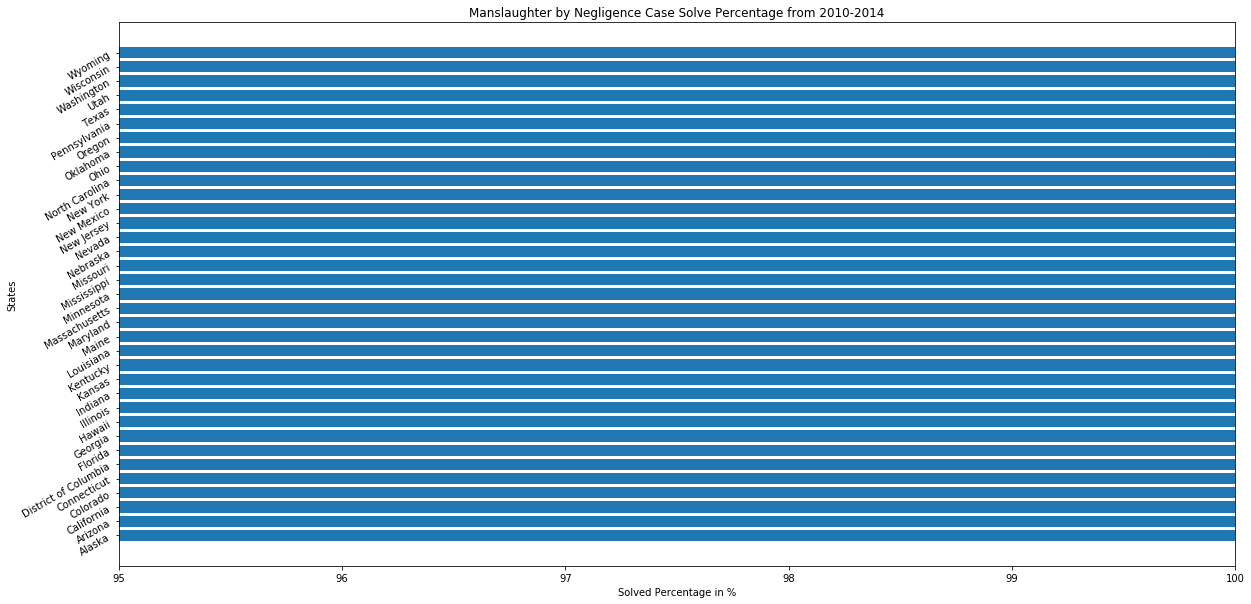

In [129]:
plt.figure(figsize=(20,10))
plt.barh(x_axis2, Solved_Per2, align='center', label='Solved Percent')
plt.yticks(x_axis2, state2, rotation=30)
plt.xlim([95,100])
plt.ylabel('States')
plt.xlabel('Solved Percentage in %')
plt.title('Manslaughter by Negligence Case Solve Percentage from 2010-2014')

##### Crimes classified as Manslaughter by Negligence all have a solved rate 100%, as manslaughter by Negligence is a crime that will alwasy be solved. On the other hand, Murder or Manslaughter in states like Idaho, Ohio, Arkansas, Colorado, and West Virginia have a relatively low percentage of solved cases. Therefore, we suggest allocating more police force on these state in crime type of Murder or Manslaughter, though obviously these crimes are more difficult to solve. 

# Business Question 2. 

## Relationship between victim and preparator:

### Along with improving the solving rate of each state/city by enhancing police force distribution, we also wanted to look at details of the crimes. Relationship between victim(s) and preparator(s) is one of the most significant part of investigation as it could lead to insights for psycologists as well as crime forensic officers.

#### Find out how many types of relationships exist in our dataset

In [100]:
%%sql
SELECT DISTINCT relationship
FROM crime;

 * postgresql://student@/final
28 rows affected.


relationship
Ex-Wife
Neighbor
Mother
Husband
Ex-Husband
Stepson
Employer
Father
Unknown
Friend


##### Add a column relation_type into dimension table crime

In [101]:
%%sql
ALTER TABLE crime
ADD COLUMN relation_type varchar(200);

 * postgresql://student@/final
Done.


[]

##### Define the 28 kinds of relationsip into 5 main categories

##### Group Wife,Husband,Ex-Wife,Ex-Husband,Boyfriend,Common-Law Husband,Common-Law Wife,Boyfriend,Girlfriend,Boyfriend/Girlfriend into category "Intimate"

In [102]:
%%sql
UPDATE crime
SET relation_type = 'Intimate'
WHERE crime.relationship in ('Wife','Husband','Ex-Wife','Ex-Husband','Boyfriend','Common-Law Husband','Common-Law Wife','Boyfriend','Girlfriend','Boyfriend/Girlfriend') ;

 * postgresql://student@/final
197 rows affected.


[]

##### Group Mother,Stepson,Stepmother,Stepfather,Daughter,Sister,Father,Stepdaughter,Brother,In-Law,Family,Son into Family

In [103]:
%%sql
UPDATE crime
SET relation_type = 'Family'
WHERE crime.relationship in  ('Mother','Stepson','Stepmother','Stepfather','Daughter','Sister','Father','Stepdaughter','Brother','In-Law','Family','Son');

 * postgresql://student@/final
277 rows affected.


[]

##### Group Neighbor, Friend, Acquanintance into Acquaintance

In [104]:
%%sql
UPDATE crime
SET relation_type = 'Acquaintance'
WHERE crime.relationship in ('Neighbor','Friend','Acquaintance');

 * postgresql://student@/final
89 rows affected.


[]

##### Group Employer and Employee into Work

In [105]:
%%sql
UPDATE crime
SET relation_type = 'Work'
WHERE crime.relationship in ('Employer','Employee');

 * postgresql://student@/final
34 rows affected.


[]

##### Group Unkown, Stranger into Stranger

In [106]:
%%sql
UPDATE crime
SET relation_type = 'Stranger'
WHERE crime.relationship in ('Unknown','Stranger');

 * postgresql://student@/final
61 rows affected.


[]

##### Amounts of crime grouped by relationship in each year from 1980-2014

In [107]:
%%sql
SELECT time.year, COUNT(*) count, crime.relation_type
FROM homicide
JOIN time
on homicide.time_key = time.key
JOIN crime
on homicide.crime_key=crime.key
GROUP BY year,relation_type
ORDER BY count desc;

 * postgresql://student@/final
175 rows affected.


year,count,relation_type
1980,6415,Acquaintance
1981,6272,Acquaintance
1986,6159,Acquaintance
1990,6033,Acquaintance
1993,5950,Stranger
1982,5920,Acquaintance
1992,5859,Stranger
1989,5818,Acquaintance
1994,5766,Stranger
1983,5678,Acquaintance


##### Export as view for future using

In [108]:
%%sql
CREATE OR REPLACE VIEW view2 AS
SELECT time.year, COUNT(*) count, crime.relation_type
FROM homicide
JOIN time
on homicide.time_key = time.key
JOIN crime
on homicide.crime_key=crime.key
GROUP BY year,relation_type
ORDER BY year;

 * postgresql://student@/final
Done.


[]

##### Export the table as dataframe for visualization

In [109]:
v2=%%sql SELECT * FROM view2;

 * postgresql://student@/final
175 rows affected.


In [110]:
v2_2=v2.DataFrame()

In [111]:
v2_2

,year,count,relation_type
0,1980,20,Work
1,1980,1764,Family
2,1980,2631,Intimate
3,1980,5372,Stranger
4,1980,6415,Acquaintance
5,1981,30,Work
6,1981,2553,Intimate
7,1981,1726,Family
8,1981,4796,Stranger
9,1981,6272,Acquaintance


In [112]:
Intimate=v2_2[v2_2["relation_type"]=="Intimate"]
Stranger=v2_2[v2_2["relation_type"]=="Stranger"]
Work=v2_2[v2_2["relation_type"]=="Work"]
Family=v2_2[v2_2["relation_type"]=="Family"]
Acquaintance=v2_2[v2_2["relation_type"]=="Acquaintance"]

##### The trend of crime amount on five each relationship from 1980 to 2014

Text(0.5,1,'Trend on relationship')

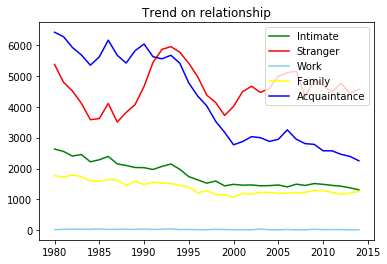

In [113]:
x_axix=v2_2.year.unique()
intimate_count=Intimate["count"]
stranger_count=Stranger["count"]
work_count=Work["count"]
family_count=Family["count"]
acquaint_count=Acquaintance["count"]
plt.title('Trend on crime and graduation_rate')
plt.plot(x_axix, intimate_count, color='green', label='Intimate')
plt.plot(x_axix, stranger_count, color='red', label='Stranger')
plt.plot(x_axix, work_count,  color='skyblue', label='Work')
plt.plot(x_axix, family_count,  color='yellow', label='Family')
plt.plot(x_axix, acquaint_count,  color='blue', label='Acquaintance')

plt.legend() 
plt.title("Trend on relationship")

##### When plotting the the trend by year for each realtionship category, we found that as years passed, the number of crimes for work did not change much. While the amount of crimes between Family members, Acquaintances and Intimate partners decreased. The number of crimes committed by strangers stayed relatively high. Could there be a reason for more crimes between strangers? We could do more research on any changes in laws, or culture that could lead to these statistics. We are able to concldue how different relationships make up different proportions of crimes.

# Business Question 3.

## Weapon Control:

### We know relationship could be one factor that could affect crime, but the Weapoon used also plays an important role in crime cases. What is the most common weapon used on victims? Does a specifi weapon have a higher fatality rate? Is the average proportion of population with guns affect the crime occurence?

##### Number of victims and the average fatality rate of each different weapons.

In [130]:
%%sql
SELECT Weapon, sum(Victim_Count) number, sum(Victim_Count)/COUNT(*) rate
FROM homicide
JOIN crime
on homicide.crime_key = crime.key
JOIN victim
on homicide.victim_key = victim.key
GROUP BY Weapon
ORDER BY number DESC;

 * postgresql://student@/final
16 rows affected.


weapon,number,rate
Handgun,25434,0.12736869516445655222
Fire,5799,1.4368186323092170
Knife,5151,0.07078271862804375309
Rifle,4398,0.23020151792724417692
Shotgun,3816,0.15185642086831947153
Firearm,3541,0.16255795804067392003
Blunt Object,2214,0.04427203103441380552
Unknown,2139,0.12224952849059838830
Explosives,1700,4.3927648578811370
Suffocation,656,0.22328114363512593601


##### Create a view to store the table

In [131]:
%%sql
DROP VIEW IF EXISTS BQ3_1;
CREATE OR REPLACE VIEW BQ3_1 AS
SELECT Weapon, sum(Victim_Count) number, sum(Victim_Count)/COUNT(*) rate
FROM homicide
JOIN crime
on homicide.crime_key = crime.key
JOIN victim
on homicide.victim_key = victim.key
GROUP BY Weapon
ORDER BY number DESC;

 * postgresql://student@/final
Done.
Done.


[]

In [132]:
v3_1 = %%sql SELECT * FROM BQ3_1
v3_1df = v3_1.DataFrame()

 * postgresql://student@/final
16 rows affected.


##### Visualization for table with number of victim and average fatality rate in different types of weapon

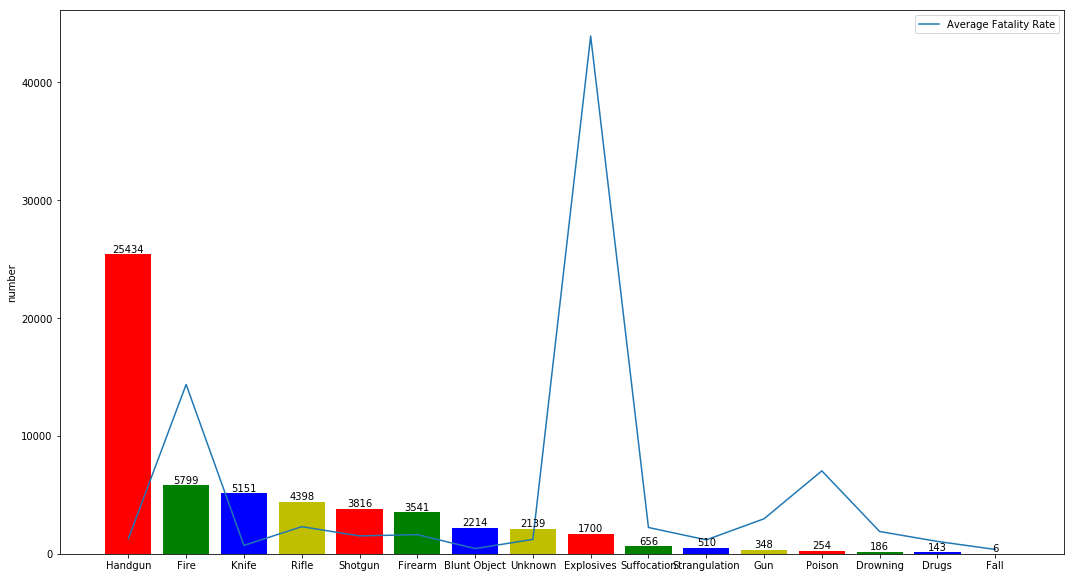

In [133]:
plt.figure(figsize=(18,10))
weapon = v3_1df.iloc[:,0]
number = v3_1df.iloc[:,1]
rate = v3_1df.iloc[:,2]*10000
rects=plt.bar(range(len(number)), number, color='rgby')
index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.xticks(index, weapon)
plt.ylabel("number") 
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height,  '%s' % int(height), ha='center', va='bottom')
plt.plot(weapon,rate)
plt.legend(["Average Fatality Rate"])
plt.show()

##### Create five even time intervals to look at the distribution of crime by category over time and find out if there is a rise or drop in certain type of wear over time.

In [134]:
%%sql
SELECT y1.Weapon, y1.count1, y2.count2, y3.count3, y4.count4, y5.count5
FROM
(SELECT Weapon, count(*) count1
FROM homicide
JOIN crime
on homicide.crime_key = crime.key
JOIN victim
on homicide.victim_key = victim.key
JOIN time
on homicide.time_key = time.key
WHERE year >= 1980 AND year <= 1986
GROUP BY Weapon) AS y1
JOIN 
(SELECT Weapon, count(*) count2
FROM homicide
JOIN crime
on homicide.crime_key = crime.key
JOIN victim
on homicide.victim_key = victim.key
JOIN time
on homicide.time_key = time.key
WHERE year >= 1987 AND year <= 1993
GROUP BY Weapon)  AS y2
on y1.Weapon = y2.Weapon
JOIN
(SELECT Weapon, count(*) count3
FROM homicide
JOIN crime
on homicide.crime_key = crime.key
JOIN victim
on homicide.victim_key = victim.key
JOIN time
on homicide.time_key = time.key
WHERE year >= 1994 AND year <= 2000
GROUP BY Weapon)  AS y3
on y1.Weapon = y3.Weapon
JOIN
(SELECT Weapon, count(*) count4
FROM homicide
JOIN crime
on homicide.crime_key = crime.key
JOIN victim
on homicide.victim_key = victim.key
JOIN time
on homicide.time_key = time.key
WHERE year >= 2001 AND year <= 2007
GROUP BY Weapon)  AS y4
on y1.Weapon = y4.Weapon
JOIN
(SELECT Weapon, count(*) count5
FROM homicide
JOIN crime
on homicide.crime_key = crime.key
JOIN victim
on homicide.victim_key = victim.key
JOIN time
on homicide.time_key = time.key
WHERE year >= 2008 AND year <= 2014
GROUP BY Weapon)  AS y5
on y1.Weapon = y5.Weapon
ORDER BY y1.count1 DESC
;

 * postgresql://student@/final
16 rows affected.


weapon,count1,count2,count3,count4,count5
Handgun,45830,49031,41007,34086,29734
Knife,20809,17850,12091,11143,10879
Blunt Object,11272,11004,9863,9500,8370
Shotgun,8613,6892,4220,3044,2360
Rifle,6158,4934,3398,2490,2125
Firearm,2326,2583,3635,5219,8020
Unknown,1954,2669,3490,4702,4682
Strangulation,1154,1196,820,644,502
Fire,1102,1101,723,634,476
Suffocation,577,539,555,659,608


In [169]:
%%sql
DROP VIEW IF EXISTS BQ3_2;
CREATE OR REPLACE VIEW BQ3_2 AS
SELECT y1.Weapon, y1.count1, y2.count2, y3.count3, y4.count4, y5.count5
FROM
(SELECT Weapon, count(*) count1
FROM homicide
JOIN crime
on homicide.crime_key = crime.key
JOIN victim
on homicide.victim_key = victim.key
JOIN time
on homicide.time_key = time.key
WHERE year >= 1980 AND year <= 1986
GROUP BY Weapon) AS y1
JOIN 
(SELECT Weapon, count(*) count2
FROM homicide
JOIN crime
on homicide.crime_key = crime.key
JOIN victim
on homicide.victim_key = victim.key
JOIN time
on homicide.time_key = time.key
WHERE year >= 1987 AND year <= 1993
GROUP BY Weapon)  AS y2
on y1.Weapon = y2.Weapon
JOIN
(SELECT Weapon, count(*) count3
FROM homicide
JOIN crime
on homicide.crime_key = crime.key
JOIN victim
on homicide.victim_key = victim.key
JOIN time
on homicide.time_key = time.key
WHERE year >= 1994 AND year <= 2000
GROUP BY Weapon)  AS y3
on y1.Weapon = y3.Weapon
JOIN
(SELECT Weapon, count(*) count4
FROM homicide
JOIN crime
on homicide.crime_key = crime.key
JOIN victim
on homicide.victim_key = victim.key
JOIN time
on homicide.time_key = time.key
WHERE year >= 2001 AND year <= 2007
GROUP BY Weapon)  AS y4
on y1.Weapon = y4.Weapon
JOIN
(SELECT Weapon, count(*) count5
FROM homicide
JOIN crime
on homicide.crime_key = crime.key
JOIN victim
on homicide.victim_key = victim.key
JOIN time
on homicide.time_key = time.key
WHERE year >= 2008 AND year <= 2014
GROUP BY Weapon)  AS y5
on y1.Weapon = y5.Weapon
ORDER BY y1.count1 DESC
;

 * postgresql://student@/final
Done.
Done.


[]

In [170]:
v3_2 = %%sql SELECT * FROM BQ3_2
v3_2df = v3_2.DataFrame()

 * postgresql://student@/final
16 rows affected.


In [171]:
v3_2df

,weapon,count1,count2,count3,count4,count5
0,Handgun,45830,49031,41007,34086,29734
1,Knife,20809,17850,12091,11143,10879
2,Blunt Object,11272,11004,9863,9500,8370
3,Shotgun,8613,6892,4220,3044,2360
4,Rifle,6158,4934,3398,2490,2125
5,Firearm,2326,2583,3635,5219,8020
6,Unknown,1954,2669,3490,4702,4682
7,Strangulation,1154,1196,820,644,502
8,Fire,1102,1101,723,634,476
9,Suffocation,577,539,555,659,608


##### Visualization for the trend of rise or drop in certain type of weapon using over time.

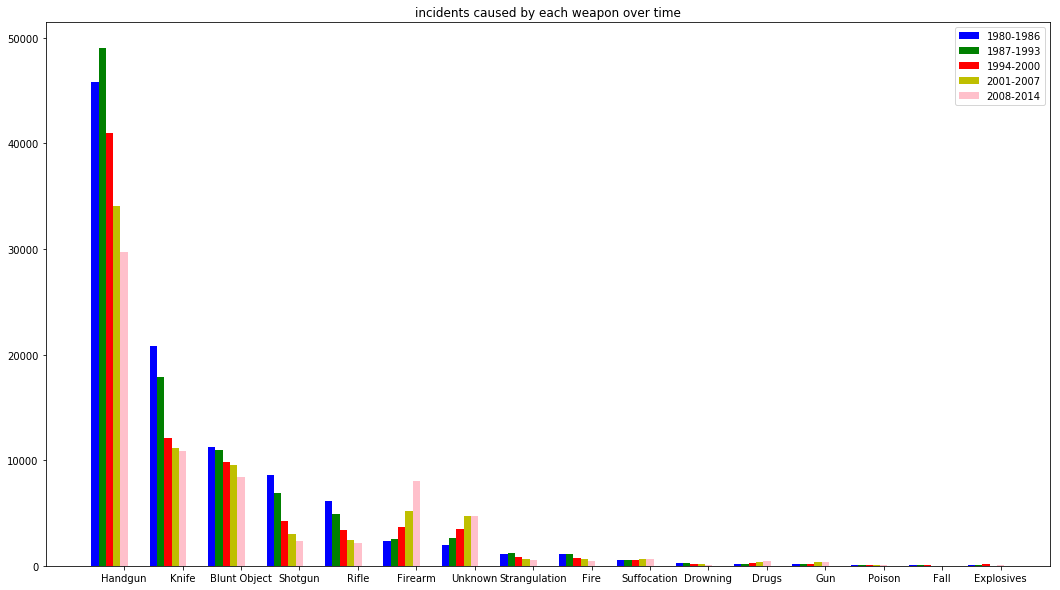

In [172]:
plt.figure(figsize=(18,10))
weapon = v3_2df.iloc[:,0]
y1 = v3_2df.iloc[:,1]
y2 = v3_2df.iloc[:,2]
y3 = v3_2df.iloc[:,3]
y4 = v3_2df.iloc[:,4]
y5 = v3_2df.iloc[:,5]
x = list(range(len(weapon)))
total_width, n = 2, 16
width = total_width / n
plt.bar(x, y1, width=width, label='1980-1986', fc='b')
for i in range(len(x)):
    x[i] += width
plt.bar(x, y2, width=width, label='1987-1993', tick_label=weapon, fc='g')
for i in range(len(x)):
    x[i] += width
plt.bar(x, y3, width=width, label='1994-2000', tick_label=weapon, fc='r')
for i in range(len(x)):
    x[i] += width
plt.bar(x, y4, width=width, label='2001-2007', tick_label=weapon, fc='y')
for i in range(len(x)):
    x[i] += width
plt.bar(x, y5, width=width, label='2008-2014', tick_label=weapon, fc='pink')
plt.title("incidents caused by each weapon over time")
plt.legend()
plt.show()

##### We can see that the gun weapons caused the largest number of victims over past 35 years. However, the average number of victims caused by guns in each incident, we say average guns’ fatality rate is not that high. 
##### Besides, the number of incidents caused by gun weapons is decreasing in the overall trend. 
##### In fact, gun control may not decrease the number of homicide even though the number of incidents using gun is still the highest. But the average fatality rate can show that gun could not increase the success rate of homicide and gun is not the reason why people murder.

# Business Question 4.

## Relationship between Death Penalty Legitimation and Crime Ratio (with additional data):

### Besides looking at the details of crimes themselves, we discussed what optios there are to prevent crimes all-together. We decided to look at the Dealth Penalty band see if lead to arease with lower crime rates. Does death penatly really prevent criminals from being maleficent to this society and citizen? We added additional data into our analysis as assistance.

##### create a new dimension table death_penalty to store our additional data

In [139]:
%%sql
DROP TABLE IF EXISTS death_penalty;

CREATE TABLE death_penalty (
    key SERIAL PRIMARY KEY,
    State    VARCHAR(100) NOT NULL,
    penalty   VARCHAR(20) NOT NULL

);

 * postgresql://student@/final
Done.
Done.


[]

##### get the addtional data file

In [140]:
!wget https://tianweima96.s3.amazonaws.com/deathpenalty.csv

--2019-12-01 19:58:33--  https://tianweima96.s3.amazonaws.com/deathpenalty.csv
Resolving tianweima96.s3.amazonaws.com (tianweima96.s3.amazonaws.com)... 52.217.36.156
Connecting to tianweima96.s3.amazonaws.com (tianweima96.s3.amazonaws.com)|52.217.36.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 753 [text/csv]
Saving to: ‘deathpenalty.csv’

deathpenalty.csv    100%[===================>]     753  --.-KB/s    in 0s      

2019-12-01 19:58:33 (27.3 MB/s) - ‘deathpenalty.csv’ saved [753/753]



##### copy the data to our table

In [141]:
%%sql
COPY death_penalty 
(State,penalty)
FROM '/home/ubuntu/Group14_Final_Project/deathpenalty.csv'
CSV
HEADER

 * postgresql://student@/final
51 rows affected.


[]

##### The table of death penalty legitimation in each state.

In [142]:
%%sql
SELECT * 
FROM death_penalty;

 * postgresql://student@/final
51 rows affected.


key,state,penalty
1,Alabama,Yes
2,Alaska,No
3,Arizona,Yes
4,Arkansas,Yes
5,California,Yes
6,Colorado,Yes
7,Connecticut,Yes
8,Delaware,Yes
9,District of Columbia,Yes
10,Florida,Yes


##### insert a new foreign key in homicide

In [143]:
%%sql
ALTER TABLE homicide 
ADD COLUMN death_penalty_key INTEGER,
ADD CONSTRAINT fk_penalty
    FOREIGN KEY (death_penalty_key)
    REFERENCES death_penalty (key);

 * postgresql://student@/final
Done.


[]

##### link our death_penalty table with the fact table

In [144]:
%%sql
UPDATE homicide
SET death_penalty_key = death_penalty.key
FROM location, death_penalty 
WHERE homicide.location_key = location.key AND location.State = death_penalty.State;

 * postgresql://student@/final
421699 rows affected.


[]

##### Bar chart of crime amount in state where death penalty is legitimate.

In [145]:
%%sql
SELECT death_penalty.State, COUNT(*) count
FROM homicide
JOIN death_penalty
on homicide.death_penalty_key = death_penalty.key
WHERE death_penalty.penalty = 'Yes'
GROUP BY State;

 * postgresql://student@/final
36 rows affected.


state,count
Alabama,8244
Indiana,7034
South Carolina,10475
Louisiana,11846
California,61549
New Hampshire,543
Connecticut,3208
Oklahoma,7187
Nevada,3675
Idaho,1033


In [146]:
%matplotlib inline

<BarContainer object of 36 artists>

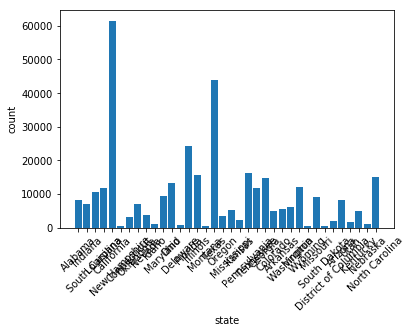

In [147]:
_.bar()

##### Bar chart of crime amount in state where death penalty is illegitimate.

In [148]:
%%sql
SELECT death_penalty.State, COUNT(*) count
FROM homicide
JOIN death_penalty
on homicide.death_penalty_key = death_penalty.key
WHERE death_penalty.penalty = 'No'
GROUP BY State;

 * postgresql://student@/final
15 rows affected.


state,count
Wisconsin,4994
Iowa,1515
Maine,766
New York,23220
Minnesota,3156
Vermont,364
Rhodes Island,790
New Mexico,3112
Hawaii,1048
North Dakota,286


In [149]:
%matplotlib inline

<BarContainer object of 15 artists>

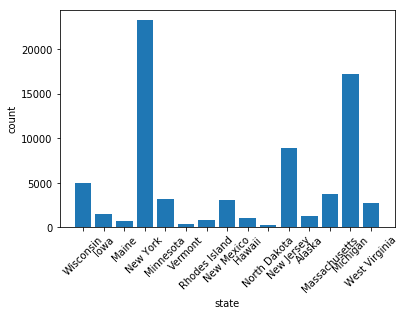

In [150]:
_.bar()

##### Total amount of crime in all state where death penalty is legitimate.

In [151]:
%%sql
SELECT COUNT(*) count
FROM homicide
JOIN death_penalty
on homicide.death_penalty_key = death_penalty.key
WHERE death_penalty.penalty = 'Yes'
;

 * postgresql://student@/final
1 rows affected.


count
348578


##### Total amount of crime in all state where death penalty is illegitimate.

In [152]:
%%sql
SELECT COUNT(*) count
FROM homicide
JOIN death_penalty
on homicide.death_penalty_key = death_penalty.key
WHERE death_penalty.penalty = 'No'
;

 * postgresql://student@/final
1 rows affected.


count
73121


##### By calculating the average crime amount of both categories, the legitimate state average crime amount is 9683, and the average amount of crime in illegitimate is 4875, which is a bit more than half of legitimate states. Therefore, we can say that dealth penalty is not detering the occurance of crime.

In [153]:
%%sql
SELECT time.year, location.State, COUNT(*) count
FROM homicide
JOIN time
on homicide.time_key = time.key
JOIN location
on homicide.location_key = location.key
WHERE (State = 'New Jersey' OR State = 'New York' OR State = 'New Mexico') AND time.year > 2000 AND time.year < 2014
GROUP BY time.year, location.State
ORDER BY State, year;

 * postgresql://student@/final
39 rows affected.


year,state,count
2001,New Jersey,224
2002,New Jersey,233
2003,New Jersey,296
2004,New Jersey,264
2005,New Jersey,250
2006,New Jersey,262
2007,New Jersey,217
2008,New Jersey,212
2009,New Jersey,173
2010,New Jersey,227


In [154]:
%%sql
DROP VIEW IF EXISTS BQ4;
CREATE OR REPLACE VIEW BQ4 AS
SELECT time.year, location.State, COUNT(*) count
FROM homicide
JOIN time
on homicide.time_key = time.key
JOIN location
on homicide.location_key = location.key
WHERE (State = 'New Jersey' OR State = 'New York' OR State = 'New Mexico') AND time.year > 2000 AND time.year < 2014
GROUP BY time.year, location.State
ORDER BY State, year;

 * postgresql://student@/final
Done.
Done.


[]

In [155]:
v4 = %%sql SELECT * FROM BQ4
v4df = v4.DataFrame()

 * postgresql://student@/final
39 rows affected.


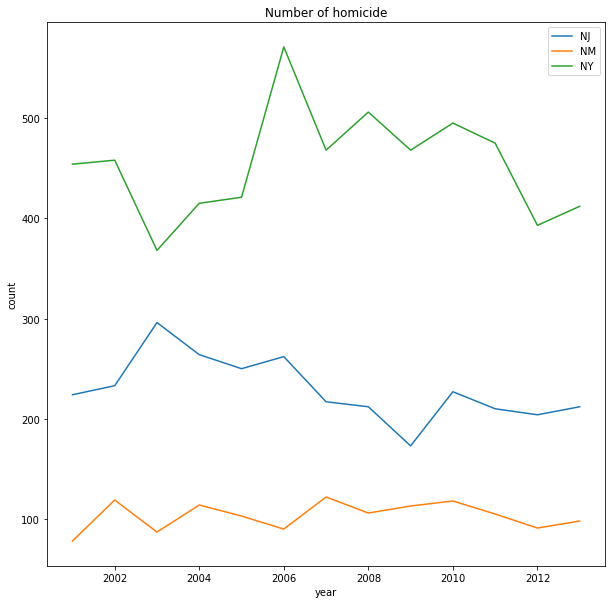

In [156]:
plt.figure(figsize=(10,10))
NJ = v4df[v4df.state == "New Jersey"]
NM = v4df[v4df.state == "New Mexico"]
NY = v4df[v4df.state == "New York"]
x = NJ.iloc[:,0]
y1 = NJ.iloc[:,2]
y2 = NM.iloc[:,2]
y3 = NY.iloc[:,2]
plt.title("Number of homicide")
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.xlabel("year")
plt.ylabel("count")
plt.legend(["NJ","NM","NY"])
plt.show()

##### In 2007 New Jersery and New York abolished dealth penalty, and in 2009 New Mexico abolished dealth penalty as well. But we can see from the graph above that there is no consistent rise of crime amount in these three states after dealth penalty abolishment. Therefore, we can state that death penalty does not deter the occurance of crime.

# Business Question 5.

## Relationship between Graduation Rate and Crime Rate (with additional data):

### When looking at more potential factors of crimes committed, we thought maybe personal background could be a factor causing a person to be more likely to commit a crime. We found additional data with graduation rates on each state, and we believe this additional dataset can assist us to see if there is a relationship between this factor and crimes committed.

##### create a table which contain each year graduation_rate 

In [157]:
%%sql
DROP TABLE IF EXISTS grad_rate;

CREATE TABLE grad_rate (
    key SERIAL PRIMARY KEY,
    year    float(10) NOT NULL,
    high   float(10) NOT NULL,
    college float(10) NOT NULL

);

 * postgresql://student@/final
Done.
Done.


[]

##### Download data from s3

In [158]:
!wget "https://gaoyux-2019.s3.amazonaws.com/graduation_rate.csv" 

--2019-12-01 20:11:36--  https://gaoyux-2019.s3.amazonaws.com/graduation_rate.csv
Resolving gaoyux-2019.s3.amazonaws.com (gaoyux-2019.s3.amazonaws.com)... 52.216.238.147
Connecting to gaoyux-2019.s3.amazonaws.com (gaoyux-2019.s3.amazonaws.com)|52.216.238.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776 [text/csv]
Saving to: ‘graduation_rate.csv’

graduation_rate.csv 100%[===================>]     776  --.-KB/s    in 0s      

2019-12-01 20:11:36 (33.1 MB/s) - ‘graduation_rate.csv’ saved [776/776]



In [159]:
%%sql
COPY grad_rate 
(year,high,college)
FROM '/home/ubuntu/Group14_Final_Project/graduation_rate.csv'
CSV
HEADER

 * postgresql://student@/final
39 rows affected.


[]

In [160]:
%%sql
SELECT * FROM grad_rate LIMIT 10;

 * postgresql://student@/final
10 rows affected.


key,year,high,college
1,2018.0,0.898,0.35
2,2017.0,0.896,0.342
3,2016.0,0.891,0.334
4,2015.0,0.884,0.325
5,2014.0,0.883,0.32
6,2013.0,0.882,0.317
7,2012.0,0.876,0.309
8,2011.0,0.876,0.304
9,2010.0,0.871,0.299
10,2009.0,0.867,0.295


##### Add a column to connect the grad_rate table to the fact table: homicide

In [161]:
%%sql
ALTER TABLE homicide 
ADD COLUMN grad_rate_key INTEGER,
ADD CONSTRAINT fk_grad
    FOREIGN KEY (grad_rate_key)
    REFERENCES grad_rate (key);

 * postgresql://student@/final
Done.


[]

In [162]:
%%sql
UPDATE homicide
SET grad_rate_key = grad_rate.key
FROM time, grad_rate
WHERE homicide.time_key = time.key AND time.year = grad_rate.year;

 * postgresql://student@/final
421699 rows affected.


[]

##### Create table PRO4 which contain year, total crime number, high school graduation rate, and college graduation rate

In [163]:
%%sql
DROP TABLE IF EXISTS PRO4 cascade;

CREATE TABLE PRO4 AS
SELECT grad_rate.year, COUNT(*) count, grad_rate.high,grad_rate.college
FROM homicide
JOIN grad_rate
on homicide.grad_rate_key = grad_rate.key
GROUP BY year,grad_rate.high,grad_rate.college
;

 * postgresql://student@/final
Done.
35 rows affected.


[]

In [164]:
%%sql
SELECT * FROM PRO4;

 * postgresql://student@/final
35 rows affected.


year,count,high,college
1999.0,9514,0.834,0.244
1994.0,14626,0.809,0.222
2014.0,9400,0.883,0.32
2007.0,10822,0.857,0.287
1987.0,12981,0.7538,0.2016
1998.0,10445,0.828,0.239
2000.0,9359,0.841,0.252
2008.0,9819,0.866,0.294
2003.0,10170,0.846,0.267
1988.0,12817,0.7612,0.2054


##### Create a view to store table 4 and export as dataframe for future visualization.

In [165]:
%%sql
CREATE OR REPLACE VIEW BQ5 AS
SELECT *
FROM PRO4
ORDER BY year;

 * postgresql://student@/final
Done.


[]

In [166]:
v5=%%sql SELECT * FROM BQ5;

 * postgresql://student@/final
35 rows affected.


In [167]:
v5_1=v5.DataFrame()

In [168]:
v5_1

,year,count,high,college
0,1980.0,16202,0.6650,0.1620
1,1981.0,15377,0.6798,0.1684
2,1982.0,14658,0.6946,0.1748
3,1983.0,14014,0.7094,0.1812
4,1984.0,12773,0.7242,0.1876
5,1985.0,13151,0.7390,0.1940
6,1986.0,14328,0.7464,0.1978
7,1987.0,12981,0.7538,0.2016
8,1988.0,12817,0.7612,0.2054
9,1989.0,13539,0.7686,0.2092


##### Now we can see the comparison between high school graduate ratio vs. crime

Text(0.5,0,'year')

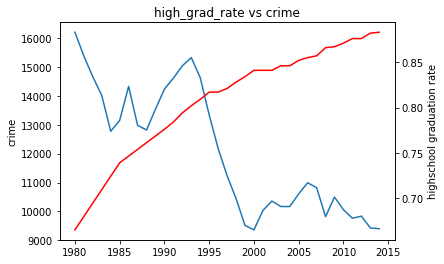

In [173]:
x_axix=v5_1.year
crime=v5_1["count"]
high_rate=v5_1.high
college_rate=v5_1.college

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x_axix,crime )
ax1.set_ylabel('crime')
ax1.set_title("high_grad_rate vs crime")

ax2 = ax1.twinx()  # this is the important function
ax2.plot(x_axix,high_rate, 'r')
#ax2.set_xlim([0, np.e])
ax2.set_ylabel('highschool graduation rate')
ax2.set_xlabel('year')


##### the comparison between college graduate ratio vs. crime

Text(0.5,0,'year')

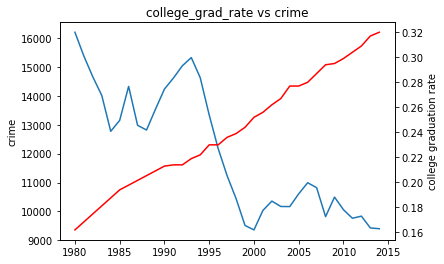

In [174]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x_axix,crime )
ax1.set_ylabel('crime')
ax1.set_title("college_grad_rate vs crime")

ax2 = ax1.twinx()  # this is the important function
ax2.plot(x_axix,college_rate, 'r')
#ax2.set_xlim([0, np.e])
ax2.set_ylabel('college graduation rate')
ax2.set_xlabel('year')

##### After mapping the college graduate and high school graduate rate with total amount of crime, we can state that higher graduate rate, either on college or on high school, will truly deduct the amount of crime through years.